#### Imports and viewing datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HCV.csv')
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [3]:
dfd = pd.read_csv('Discretization.csv')
dfd

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


#### Supporting Functions

##### The unique function gives a list of all unique elements in a list

In [4]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

##### The breaks function gives the discretized break points to each of the given attributes

In [5]:
def breaks(a):
    if a in [0,2,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26]:
        my_list = dfd['Discretization (Items)'][a].split(";")
        removetable = str.maketrans('', '', "'[]'")
        a = [s.translate(removetable) for s in my_list]
        k=l=[0]*15
        for i in range(0,len(a)):
            if ":" not in a[i]:
                k[i] = a[i].split(",")
                l[i] = int(k[i][0])
                l.sort()
        return unique(l)
    elif a in [1,3,4,5,6,7,8,9,10]:
        my_list = dfd['Feature Values'][a].split(",")
        return my_list
    elif a == 13:
        return [0,2,13,16,20]
    else:
        my_list = dfd['Discretization (Items)'][a].split(",")
        removetable = str.maketrans('', '', " '[]-'")
        a = [s.translate(removetable) for s in my_list]
        return a

##### The ranger function gives the range in which the value of the given attribute falls in

In [7]:
def ranger(a,t):
    for i in range(0, len(t)):
        if (a > t[i] and t[i] == max(t)):
            x = t[i-1]
            y = t[i]
        elif (a > t[i] and t[i] != max(t)):
            x = t[i]
            y = t[i+1]
    return x,y    

#### Driver Function

In [10]:
from itertools import repeat
d = [[] for i in repeat(None, 30)]

for j in list(df.iloc[:,0]):
    if j<62:
        d[0].append(list(ranger(j, breaks(0))))
    else:
        d[0].append([0,0])

for i in [2,22,23,24,25,26]:
    for j in list(df.iloc[:,i]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [11,12,14,15,16,17,18,19,20,21]:
    for j in list(df.iloc[:,i-1]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [1,3,4,5,6,7]:
    for j in list(df.iloc[:,i]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")

for i in [9,10]:
    for j in list(df.iloc[:,i-1]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")            


for j in list(df.iloc[:,12]):
    d[13].append(ranger(j, breaks(13)))

for j in list(df.iloc[:,28]):
    if j == 1:
        d[28].append(breaks(28)[1])
    elif j == 2:
        d[28].append(breaks(28)[2])
    elif j == 3:
        d[28].append(breaks(28)[3])
    else:
        d[28].append(breaks(28)[4])

d[27] = df.iloc[:,27]

for j in list(df.iloc[:,21]):
    d[29].append(list(ranger(j, breaks(22))))
    
d.remove(d[8])

##### Final Dataset ready for use after cleaning

In [11]:
df_final = pd.DataFrame(np.array(d).T.tolist(), columns = ['Age ',
 'Gender',
 'BMI',
 'Fever',
 'Nausea/Vomting',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Jaundice ',
 'Epigastric pain ',
 'WBC',
 'RBC',
 'HGB',
 'Plat',
 'AST 1',
 'ALT 1',
 'ALT4',
 'ALT 12',
 'ALT 24',
 'ALT 36',
 'ALT 48',
 'RNA Base',
 'RNA 4',
 'RNA 12',
 'RNA EOT',
 'RNA EF',
 'Baseline histological Grading',
 'Baselinehistological staging',
 'ALT after 24 w'])
df_final

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,"[30, 35]",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20]","[0, 20]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[0, 5]","[0, 5]",13,Staging(ClassLabel)FewSepta,"[0, 5]"
1,"[42, 47]",Male,"[25, 30]",Absent,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[5, 1201086]"
2,"[52, 57]",Male,"[30, 35]",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20]","[0, 20]","[5, 1201086]","[5, 1201715]","[0, 5]","[5, 808450]","[5, 808450]",4,Cirrhosis,"[0, 5]"
3,"[47, 52]",Female,"[30, 35]",Absent,Present,Absent,Present,Absent,Present,Absent,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",10,ManySepta,"[5, 1201086]"
4,"[57, 62]",Male,"[30, 35]",Absent,Absent,Present,Absent,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",11,PortalFibrosis,"[5, 1201086]"
5,"[57, 62]",Female,"[0, 25]",Present,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[0, 5]","[0, 5]","[0, 5]",4,Cirrhosis,"[5, 1201086]"
6,"[37, 42]",Female,"[25, 30]",Absent,Absent,Present,Present,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",12,Cirrhosis,"[5, 1201086]"
7,"[47, 52]",Female,"[25, 30]",Absent,Absent,Present,Present,Absent,Absent,Present,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",12,ManySepta,"[5, 1201086]"
8,"[42, 47]",Male,"[0, 25]",Absent,Absent,Present,Present,Present,Absent,Present,...,"[40, 128]","[20, 40]","[5, 1201086]","[5, 1201715]","[0, 5]","[5, 808450]","[5, 808450]",5,Staging(ClassLabel)FewSepta,"[5, 1201086]"
9,"[42, 47]",Male,"[25, 30]",Present,Absent,Present,Present,Absent,Absent,Present,...,"[40, 128]","[40, 128]","[5, 1201086]","[5, 1201715]","[5, 3731527]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[5, 1201086]"


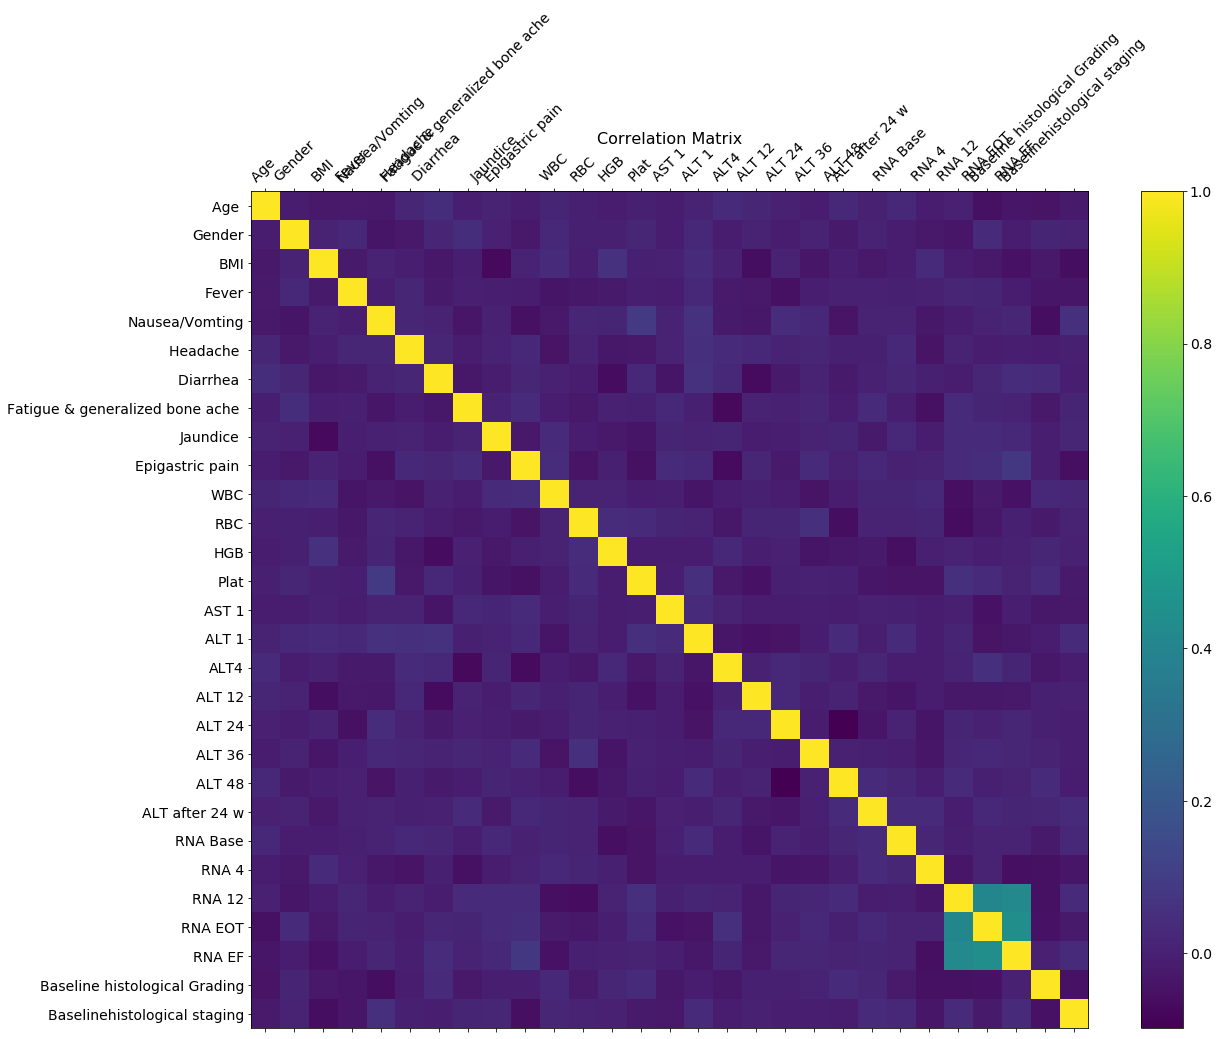

In [15]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);